# Prediccion usando Fbprophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('retail_sales.csv', index_col='date', parse_dates=True)

In [3]:
sales_df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


In [4]:
# colocamos el indice como columna
df = sales_df.reset_index()

In [5]:
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [6]:
# renombramos las columnas al formato de fbprophet
df=df.rename(columns={'date':'ds', 'sales':'y'})

In [7]:
df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


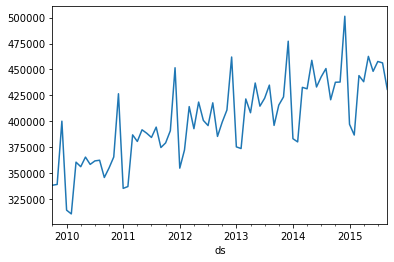

In [8]:
# Graficamos la data
df.set_index('ds')["y"].plot()

In [9]:
# para remover anomalias fbprophet recomienda obtener el logaritmo de los datos
df['y'] = np.log(df['y'])

In [10]:
df.tail()

,ds,y
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993
71,2015-09-01,12.973671


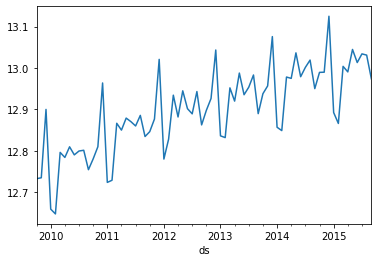

In [11]:
# verificamos la grafica
df.set_index('ds')["y"].plot()

In [12]:
# Creamos el modelo que contiene fbprophet
model = Prophet()
# Entrenamos el modelo
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
#Vamos a proceder a predecir dos a;os en el futuro para  eso creamos un dataframe de 24 meses
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [14]:
# predecimos
forecast = model.predict(future)

In [15]:
#observamos la data
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2017-04-30,13.041237,12.852551,13.257042,12.837193,13.237367,0.018364,0.018364,0.018364,0.018364,0.018364,0.018364,0.0,0.0,0.0,13.059601
92,2017-05-31,13.042942,12.831924,13.266471,12.820317,13.249957,0.012932,0.012932,0.012932,0.012932,0.012932,0.012932,0.0,0.0,0.0,13.055874
93,2017-06-30,13.044592,12.837831,13.298121,12.804075,13.266596,0.031733,0.031733,0.031733,0.031733,0.031733,0.031733,0.0,0.0,0.0,13.076325
94,2017-07-31,13.046298,12.798666,13.293805,12.786659,13.284785,0.009755,0.009755,0.009755,0.009755,0.009755,0.009755,0.0,0.0,0.0,13.056053
95,2017-08-31,13.048003,12.746165,13.283850,12.769482,13.305138,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,0.0,0.0,0.0,13.027370


In [16]:
#solo vamos a usar ds que son las fechas
# yhat que son las predicciones
# yhat_lower nivel de confianza al 95% menor
# yhat_upper nivel de confianza al 95% mayor
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.059601,12.852551,13.257042
92,2017-05-31,13.055874,12.831924,13.266471
93,2017-06-30,13.076325,12.837831,13.298121
94,2017-07-31,13.056053,12.798666,13.293805
95,2017-08-31,13.027370,12.746165,13.283850


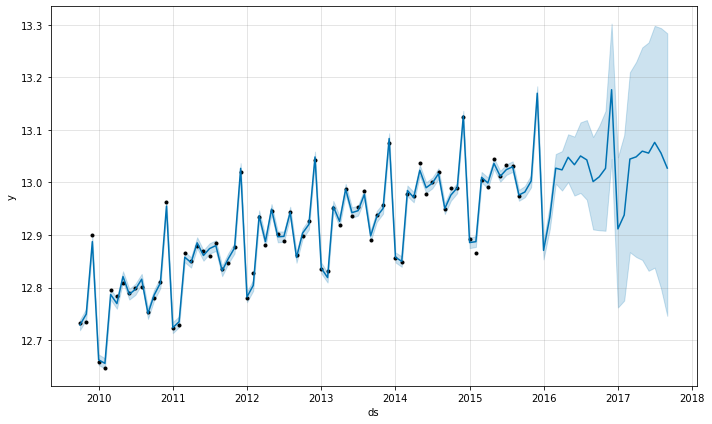

In [17]:
# Graficamos los parametros
model.plot(forecast);

In [18]:
#Preparamos los datos para unir el dataset con la prediccion
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [19]:
df.tail()

,y
ds,
2015-05-01,13.044650
2015-06-01,13.013060
2015-07-01,13.033991
2015-08-01,13.030993
2015-09-01,12.973671


In [20]:
forecast.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2017-04-30,13.041237,12.852551,13.257042,12.837193,13.237367,0.018364,0.018364,0.018364,0.018364,0.018364,0.018364,0.0,0.0,0.0,13.059601
2017-05-31,13.042942,12.831924,13.266471,12.820317,13.249957,0.012932,0.012932,0.012932,0.012932,0.012932,0.012932,0.0,0.0,0.0,13.055874
2017-06-30,13.044592,12.837831,13.298121,12.804075,13.266596,0.031733,0.031733,0.031733,0.031733,0.031733,0.031733,0.0,0.0,0.0,13.076325
2017-07-31,13.046298,12.798666,13.293805,12.786659,13.284785,0.009755,0.009755,0.009755,0.009755,0.009755,0.009755,0.0,0.0,0.0,13.056053
2017-08-31,13.048003,12.746165,13.283850,12.769482,13.305138,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,0.0,0.0,0.0,13.027370


In [21]:
#unimos el dataset original con la prediccion
union_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [22]:
union_df.head()

,sales,yhat,yhat_lower,yhat_upper
2009-10-01,338630.0,12.728916,12.718812,12.738561
2009-11-01,339386.0,12.749435,12.739040,12.759768
2009-12-01,400264.0,12.887444,12.877375,12.897285
2010-01-01,314640.0,12.662469,12.652586,12.672699
2010-02-01,311022.0,12.655825,12.645891,12.665439


In [23]:
union_df.tail()

,sales,yhat,yhat_lower,yhat_upper
2017-04-30,NaN,13.059601,12.852551,13.257042
2017-05-31,NaN,13.055874,12.831924,13.266471
2017-06-30,NaN,13.076325,12.837831,13.298121
2017-07-31,NaN,13.056053,12.798666,13.293805
2017-08-31,NaN,13.027370,12.746165,13.283850


In [24]:
# escalamos a los valores originales los anteriormente escalados
union_df['yhat_rescaled'] = np.exp(union_df['yhat'])

In [25]:
union_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
2009-10-01,338630.0,12.728916,12.718812,12.738561,337363.512361
2009-11-01,339386.0,12.749435,12.739040,12.759768,344357.309601
2009-12-01,400264.0,12.887444,12.877375,12.897285,395317.159234
2010-01-01,314640.0,12.662469,12.652586,12.672699,315675.290364
2010-02-01,311022.0,12.655825,12.645891,12.665439,313584.857535


In [26]:
union_df.tail()

,sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
2017-04-30,NaN,13.059601,12.852551,13.257042,469583.265754
2017-05-31,NaN,13.055874,12.831924,13.266471,467836.523832
2017-06-30,NaN,13.076325,12.837831,13.298121,477502.742432
2017-07-31,NaN,13.056053,12.798666,13.293805,467920.138025
2017-08-31,NaN,13.027370,12.746165,13.283850,454689.619378


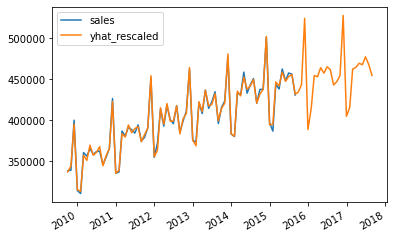

In [27]:
union_df[['sales', 'yhat_rescaled']].plot()